In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
dataframe = pd.read_csv("Zomato data .csv")

print=dataframe.head()


In [62]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [63]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
dataframe['rate']=dataframe['rate'].apply(handleRate)
print=dataframe.head()

In [65]:
print=dataframe.head()

In [66]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [68]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [70]:
dataframe.isnull()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


# Let’s explore the listed_in (type) column.

Text(0.5, 0, 'type of restaurant')

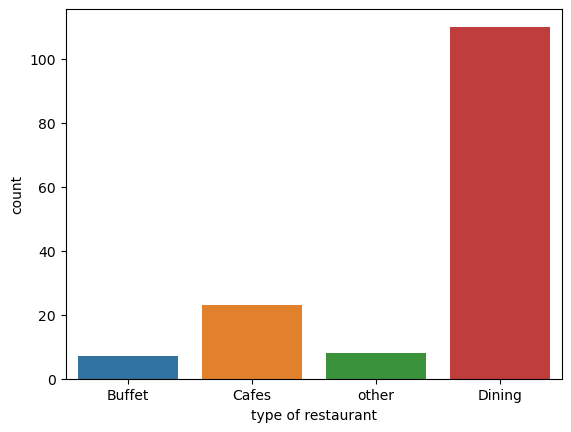

In [71]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("type of restaurant")

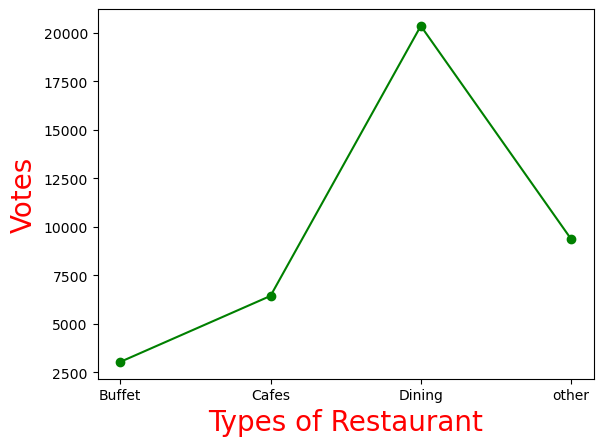

In [72]:
grouped_data = dataframe.groupby("listed_in(type)")['votes'].sum()

# Create a DataFrame for the result
result = pd.DataFrame({'votes': grouped_data})

# Plotting the result
plt.plot(result, c="green", marker="o")  # Correct marker is 'o'

# Setting axis labels
plt.xlabel('Types of Restaurant', c="red", size=20)  # Correct size argument
plt.ylabel("Votes", c="red", size=20)  # Correct ylabel method

# Display the plot
plt.show()


Text(0, 0.5, 'Votes')

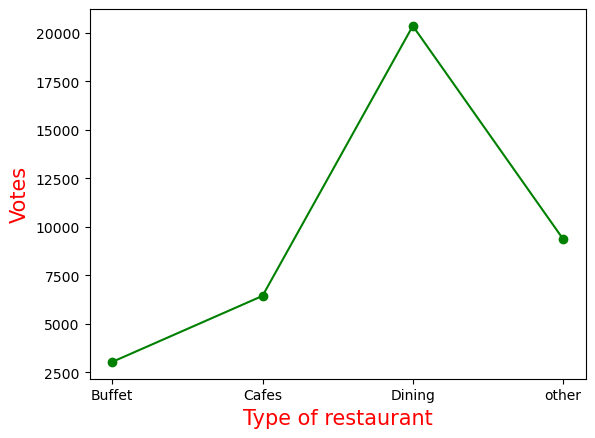

In [73]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=15)
plt.ylabel("Votes", c="red", size=15)

## Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [85]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, "name"]
print('Restaurant(s) with maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


# Let’s explore the online_order column.

<Axes: xlabel='online_order', ylabel='count'>

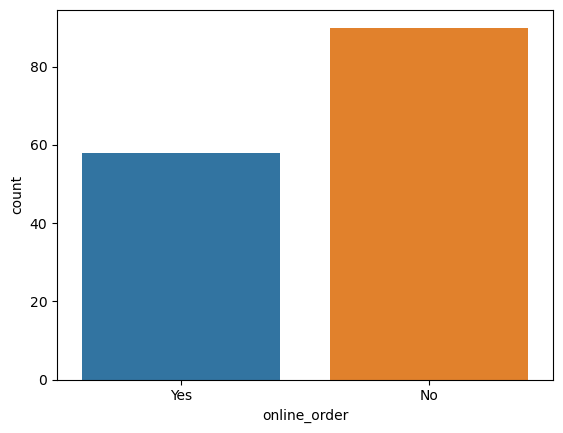

In [91]:
sns.countplot(x=dataframe['online_order'])



*Conclusion: This suggests that a majority of the restaurants do not accept online orders.*



## Let’s explore the rate column.

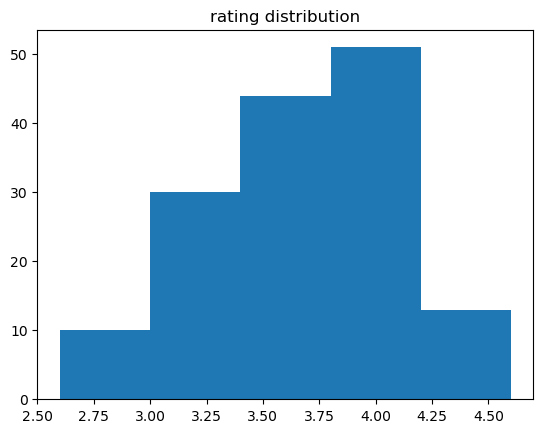

In [94]:
plt.hist(dataframe['rate'],bins=5)
plt.title("rating distribution")
plt.show()



*Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.*



## Let’s explore the approx_cost(for two people) column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

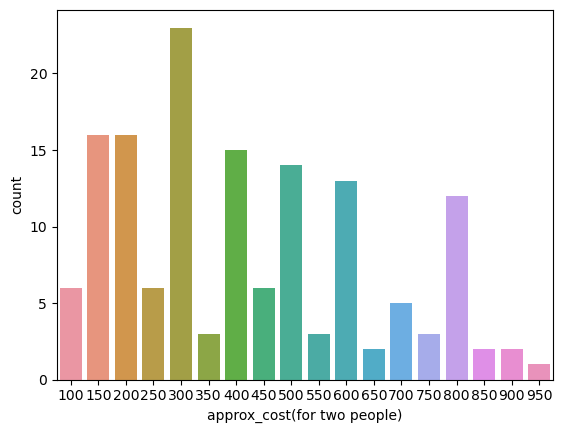

In [97]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

 
 *Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.*

## Now we will examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

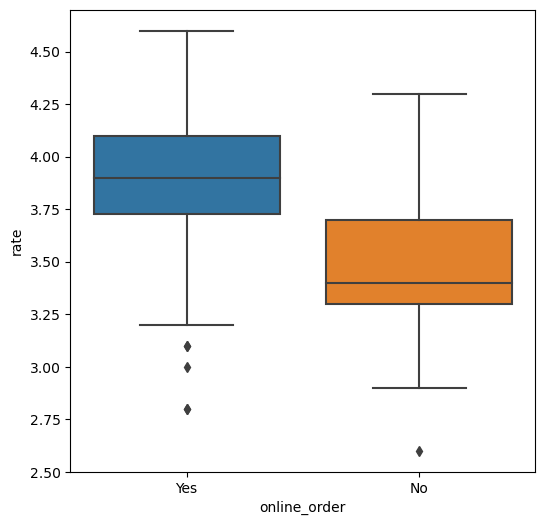

In [98]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

*CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.*

##  Heatmap Visualization of Online Order Availability Across Different Listing Types

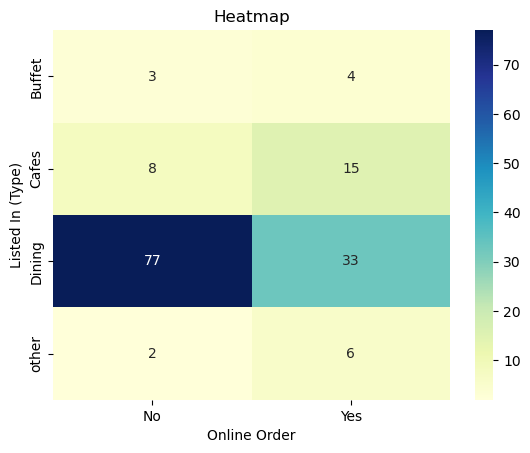

In [102]:

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.